In [30]:
import pandas as pd 
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

In [31]:
# to check if file is input
spearmanr([1,2,3,4,5],[5,6,7,8,7])

SpearmanrResult(correlation=0.8207826816681233, pvalue=0.08858700531354381)

In [32]:
weather = '../Weather/edit_weather-2011-2016.csv'
dfw = pd.read_csv(weather, header=0)
year = '../From Zibei/result_year.csv'
dfy = pd.read_csv(year, header=0)

In [33]:
weathersize = dfw.shape[1]
yearsize = dfy.shape[1]
weather_columns = list(dfw.columns.values)
year_columns = list(dfy.columns.values)

In [34]:
adjust = 0
if(len(dfw)>len(dfy)):
    adjust = len(dfy)
else:
    adjust = len(dfw)
for i in range(1,weathersize):
    wid = weather_columns[i]
    wdfe = dfw[wid][:adjust]
    for j in range(1,yearsize):
        yid = year_columns[j]
        ydfe = dfy[yid][:adjust]
        correlation = spearmanr(wdfe,ydfe)
        print(wid,yid,correlation)
        

Spd Collisions SpearmanrResult(correlation=-0.7999999999999999, pvalue=0.20000000000000007)
Temp Collisions SpearmanrResult(correlation=-0.6000000000000001, pvalue=0.3999999999999999)
Prcp Collisions SpearmanrResult(correlation=-0.39999999999999997, pvalue=0.6)
SD Collisions SpearmanrResult(correlation=0.39999999999999997, pvalue=0.6)
SDW Collisions SpearmanrResult(correlation=0.9486832980505139, pvalue=0.051316701949486114)


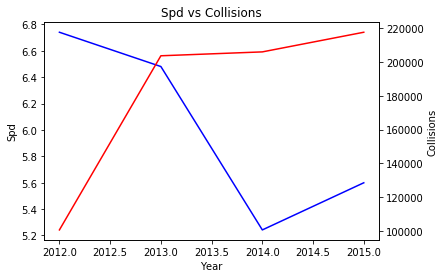

In [37]:
x = list(dfw['Year'][:adjust])
y1 = list(dfw['Spd'][:adjust])
y2 = list(dfy['Collisions'][:adjust])
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x,y1,'b-')
ax1.set_ylabel('Spd')
ax2 = ax1.twinx()
ax2.plot(x,y2,'r-')
ax2.set_ylabel('Collisions')
ax1.set_xlabel('Year')
plt.title('Spd vs Collisions')
plt.savefig('Weather_collisions.png')